In [1]:
### DATA DRIVEN APPROACH ### (or) ### TIME SERIES ####
###If your data does not have trend or seasonal component - You choose the following Time series Analays
# 1.Moving Average
# 2.Single Exponential Smoothing 
### If Your data have a trend but do not have a seasonal component - You choose following Time Series
# 3.Trend Analysis 
# 4.Double Expontiel Smoothing
###IF your data have seasinol component with or without trend - You can Choose 
# 5.Decomposition 
# 6.Holt's winter Method
# ARIMA (Auto Regressive Integrated Moving Average ) - You choose this all scenrio

In [1]:
## TIME-SERIES ##

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [53]:
df=pd.read_csv("C:/Users/bharghava/Downloads/jetrailTest.csv")## df means dataframe 

In [54]:
df.head() ## To show first five rows and columns infor of jetrailTest file

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [55]:
df.tail### To show last five rows and colums info of jetrailTest file

<bound method NDFrame.tail of          ID          Datetime
0     18288  26-09-2014 00:00
1     18289  26-09-2014 01:00
2     18290  26-09-2014 02:00
3     18291  26-09-2014 03:00
4     18292  26-09-2014 04:00
...     ...               ...
5107  23395  26-04-2015 19:00
5108  23396  26-04-2015 20:00
5109  23397  26-04-2015 21:00
5110  23398  26-04-2015 22:00
5111  23399  26-04-2015 23:00

[5112 rows x 2 columns]>

In [8]:
##I’m subsetting and aggregating dataset at daily basis to explain the different methods.
##Subsetting the dataset from (August 2012 – Dec 2013)
##Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
##Aggregating the dataset at daily basis

In [56]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df=pd.read_csv("C:/Users/bharghava/Downloads/jetrailTrain.csv",nrows = 11856)

In [20]:
jetrail.head() # To show first five rows and columns of jetrailTrain data file

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [57]:
df.tail() # To show last five rows and columns of jetrailTrain data file

,ID,Datetime,Count
11851,11851,31-12-2013 19:00,286
11852,11852,31-12-2013 20:00,256
11853,11853,31-12-2013 21:00,228
11854,11854,31-12-2013 22:00,216
11855,11855,31-12-2013 23:00,246


In [118]:
df.sort_index(inplace = True)
print(df.shape)
print(df.info())

(494, 2)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2012-08-25 to 2013-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      494 non-null    float64
 1   Count   494 non-null    float64
dtypes: float64(2)
memory usage: 11.6 KB
None


In [127]:
train = train.asfreq('D')
test = test.asfreq('D')
train = train.dropna()
test = test.dropna()

In [130]:
df_pred = pd.read_csv("C:/Users/bharghava/Downloads/jetrailTest.csv", parse_dates = ['Datetime'], index_col = 'Datetime')
print(df_pred.head())

                        ID
Datetime                  
2014-09-26 00:00:00  18288
2014-09-26 01:00:00  18289
2014-09-26 02:00:00  18290
2014-09-26 03:00:00  18291
2014-09-26 04:00:00  18292


In [131]:
print(df_pred.shape)

(5112, 1)


In [132]:
print(df_pred.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5112 entries, 2014-09-26 00:00:00 to 2015-04-26 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5112 non-null   int64
dtypes: int64(1)
memory usage: 79.9 KB
None


In [139]:
df_pred.head()

""
Datetime
2014-09-26
2014-09-27
2014-09-28
2014-09-29
2014-09-30


In [122]:
# splint the datafile 
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

<AxesSubplot:xlabel='Datetime'>

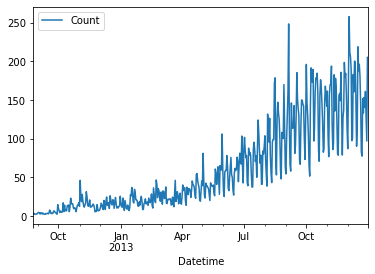

In [140]:
df.plot()

In [144]:
df.isnull().any()

Count    False
dtype: bool

In [146]:
df = df.dropna()

In [147]:
df.info

<bound method DataFrame.info of                  Count
Datetime              
2012-08-25    3.166667
2012-08-26    3.666667
2012-08-27    2.583333
2012-08-28    2.416667
2012-08-29    2.500000
...                ...
2013-12-27  161.166667
2013-12-28  128.500000
2013-12-29   97.083333
2013-12-30  205.333333
2013-12-31  202.500000

[494 rows x 1 columns]>

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.sort_index()

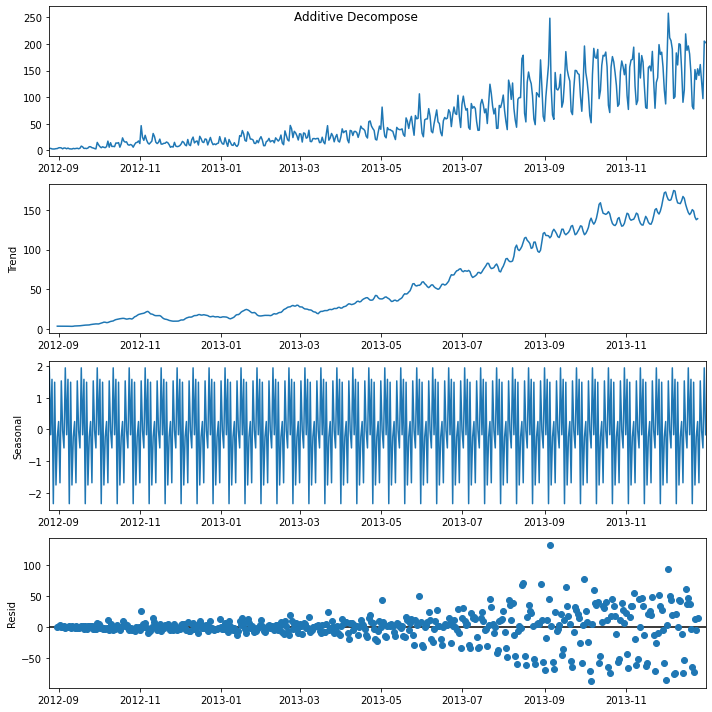

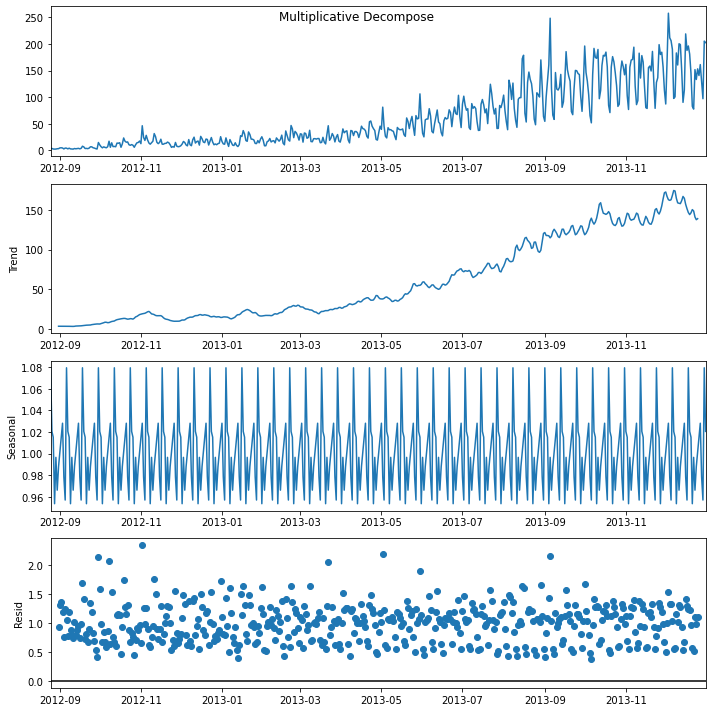

In [161]:
decompose_multiplicative = seasonal_decompose(df, model='multiplicative', period = 12)
decompose_additive = seasonal_decompose(df, model = 'additive', period = 12)
plt.rcParams.update({'figure.figsize': (10,10)})
decompose_additive.plot().suptitle('Additive Decompose', fontsize = 12)
decompose_multiplicative.plot().suptitle('Multiplicative Decompose', fontsize = 12)
#plt.show() ## when your using cmd you can use it

In [155]:
#ADF Test
#The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis.


In [164]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Count'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.16568752036719375
p-value: 0.9702700999912237


In [165]:
## using for loop to print null values of 1% , 5% , 10%
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.4441047380903007
Critial Values:
   5%, -2.867605550172837
Critial Values:
   10%, -2.570000704119326


In [176]:
df["Count diff"] = df["Count"]- df["Count"].shift(1) ## creating a dummay variable name as count diff
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2012-08-28 to 2013-12-31
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Count       491 non-null    float64
 1   Count diff  491 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB


In [178]:
## again reprocessing the  critial values 
esult = adfuller(df["Count diff"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items(): ## %1, %5, %10
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.16568752036719375
p-value: 0.9702700999912237
Critial Values:
   1%, -3.4441047380903007
Critial Values:
   5%, -2.867605550172837
Critial Values:
   10%, -2.570000704119326


In [180]:
## AUTO CORRELATION FUNCTION MEANS
##1.Autocorrelation measures a set of current values against a set of past values to see if they correlate.
#2.It is heavily used in time series analysis and forecasting. ...
##3.A plot of the autocorrelation of a time series is called the Autocorrelation Function (ACF)
###PACF
### 1.the partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. 
##2.It contrasts with the autocorrelation function, which does not control for other lags.
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_50 = acf(df['Count diff'], nlags=50)
pacf_50 = pacf(df['Count diff'], nlags=50)
print(acf_50)
print(pacf_50)

[ 1.         -0.01972828 -0.35506903 -0.11350656 -0.11206332 -0.30162533
  0.1169496   0.6105859   0.08364068 -0.3082007  -0.07623641 -0.15389186
 -0.27944108  0.13190009  0.55765042  0.15228967 -0.2995776  -0.12340635
 -0.16610155 -0.24466205  0.16814452  0.50591798  0.10787774 -0.29308577
 -0.09066699 -0.10975892 -0.25170411  0.0913936   0.55137396  0.09778555
 -0.28782768 -0.09675851 -0.08659072 -0.2594874   0.13060767  0.48050694
  0.11132127 -0.28184534 -0.11875308 -0.05659759 -0.24776065  0.12377545
  0.46177948  0.09086554 -0.23626518 -0.12064241 -0.07773415 -0.21495647
  0.11264137  0.44695761  0.0771696 ]
[ 1.         -0.01976854 -0.35705159 -0.1500013  -0.29776653 -0.56666032
 -0.43229081  0.1509604   0.09759833 -0.03697893  0.06406625 -0.08182431
 -0.225255   -0.27060437 -0.03014615  0.15772341  0.0492121   0.03688796
 -0.06838554 -0.14097454 -0.104534    0.00663963 -0.00277778 -0.13022073
 -0.04666252  0.04337575 -0.00721985 -0.2053479   0.0476317  -0.01362193
 -0.09586067 

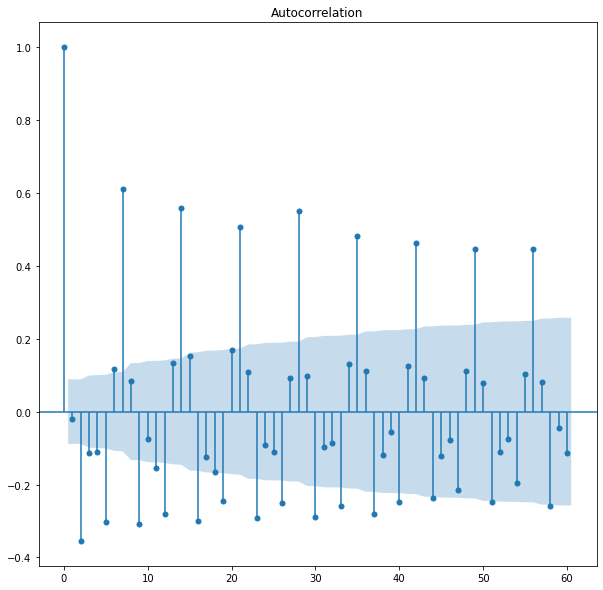

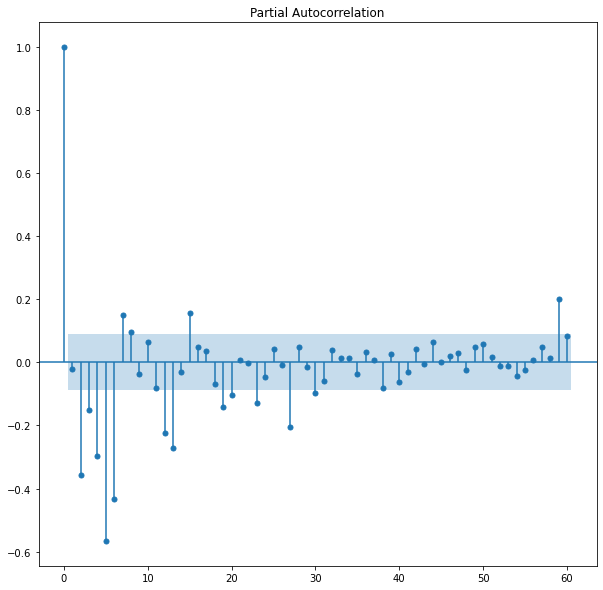

In [181]:
plot_acf(df["Count diff"], lags= 60, alpha=0.05); ## ACF PLOT
plot_pacf(df["Count diff"], lags= 60, alpha=0.05); ## PACF PLOT

ValueError: zero-size array to reduction operation fmin which has no identity

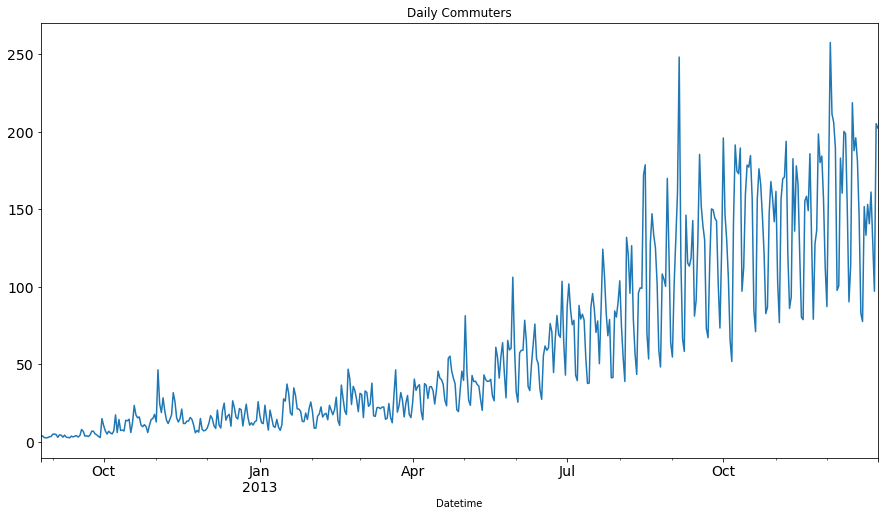

In [183]:
#plotting data
train['Count'].plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)
test['Count'].plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)


In [ ]:
##Method 1: Start with a Naive Approach
##Forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method. 
##Now we will implement the Naive method to forecast the prices for test data.

Text(0.5, 1.0, 'Naive Forecast')

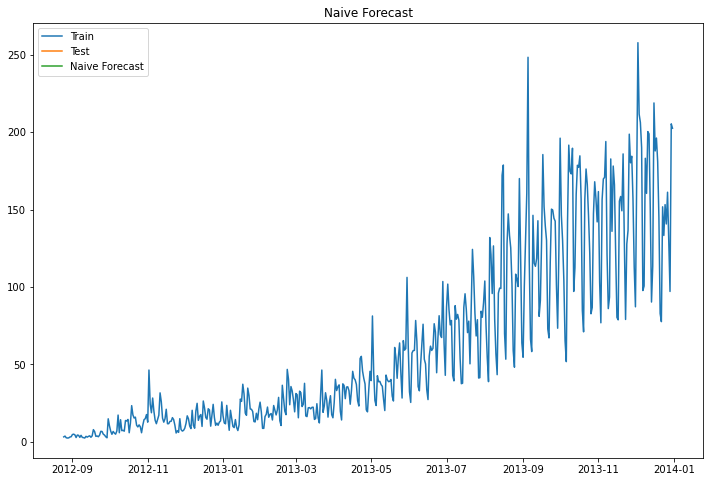

In [194]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")


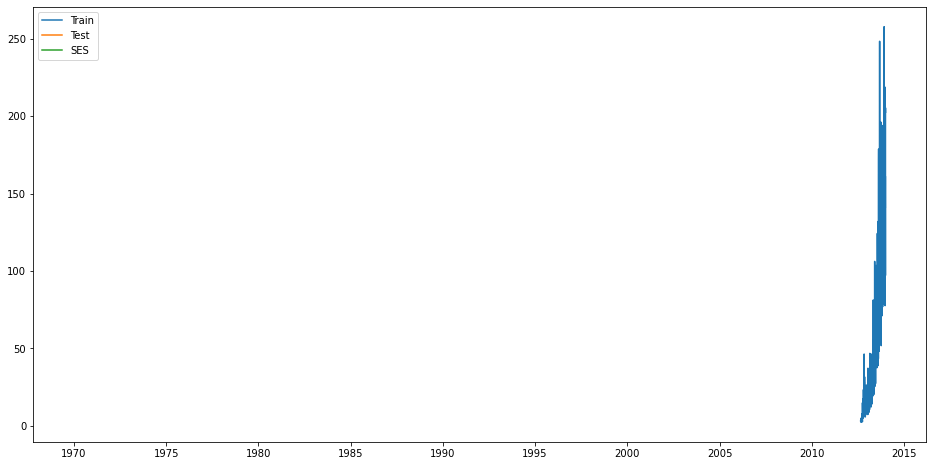

In [208]:
## Exponentional smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test)) # Simple Exponential Smoothing.
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

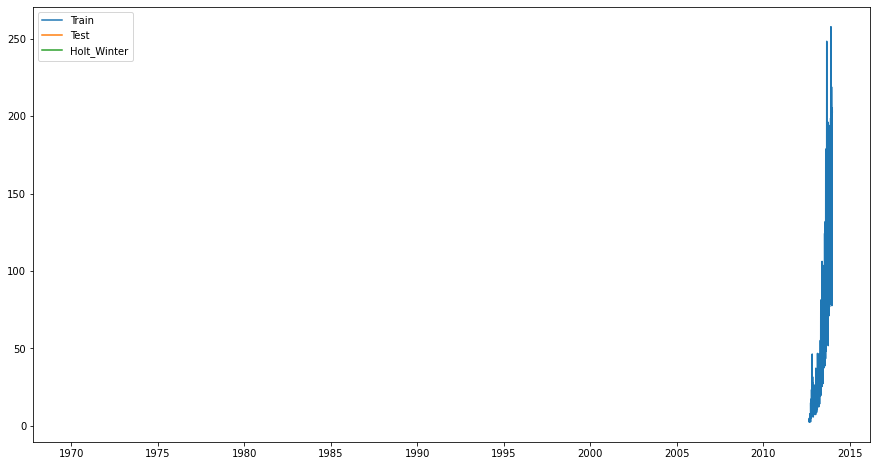

In [228]:
#Holt's Winter
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=12, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
